In [75]:
import matplotlib.pyplot as plt

In [76]:
with open('result_file.txt') as f:
    res_sat = eval(f.read())

In [77]:
with open('result_file_min.txt') as f:
    res_min = eval(f.read())

In [78]:
import pandas

In [79]:
df_min = pandas.DataFrame(res_min)
df_min

chuffed_int  coin-bc_int  cplex_float  cplex_int  gecode_int  gist_int  \
nb          4.000        4.000        6.000      4.000       4.000     4.000   
time        1.018        1.255        2.088      1.285       1.061     1.187   

      gurobi_float  gurobi_int  highs_int  sat_int  scip_float  scip_int  \
nb           6.000       4.000        NaN    4.000       6.000     4.000   
time         1.927       1.336        NaN    1.124       2.458     1.712   

      xpress_int  
nb           NaN  
time         NaN

In [80]:
df_min_mi = df_min.copy()
df_min_mi.columns = pandas.MultiIndex.from_tuples([tuple(x.split('_')) for x in df_min.columns])
df_min_mi = df_min_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_min_mi

chuffed coin-bc  cplex        gecode   gist gurobi        highs    sat  \
         int     int    int  float    int    int    int  float   int    int   
nb     4.000   4.000  4.000  6.000  4.000  4.000  4.000  6.000   NaN  4.000   
time   1.018   1.255  1.285  2.088  1.061  1.187  1.336  1.927   NaN  1.124   

       scip        xpress  
        int  float    int  
nb    4.000  6.000    NaN  
time  1.712  2.458    NaN

<AxesSubplot:>

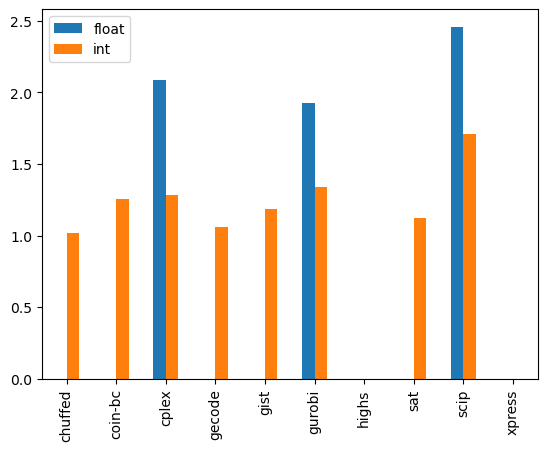

In [81]:
df_min_mi.loc['time'].unstack().plot(kind='bar')

In [82]:
df_sat = pandas.DataFrame(res_sat)
df_sat

chuffed_int  coin-bc_int  cplex_float  cplex_int  gecode_int  gist_int  \
nb          4.000        5.000       47.000      5.000       4.000     4.000   
time        1.254        1.894       18.362      1.897       1.385     1.397   

      gurobi_float  gurobi_int  highs_int  sat_int  scip_float  scip_int  \
nb             NaN         NaN      4.000      0.0       5.000     7.000   
time           4.5        1.25      1.699      NaN       2.631     3.208   

      xpress_int  
nb           NaN  
time         NaN

In [83]:
df_sat_mi = df_sat.copy()
df_sat_mi.columns = pandas.MultiIndex.from_tuples([tuple(x.split('_')) for x in df_sat.columns])
df_sat_mi = df_sat_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_sat_mi

chuffed coin-bc  cplex         gecode   gist gurobi        highs  sat  \
         int     int    int   float    int    int    int float    int  int   
nb     4.000   5.000  5.000  47.000  4.000  4.000    NaN   NaN  4.000  0.0   
time   1.254   1.894  1.897  18.362  1.385  1.397   1.25   4.5  1.699  NaN   

       scip        xpress  
        int  float    int  
nb    7.000  5.000    NaN  
time  3.208  2.631    NaN

<AxesSubplot:>

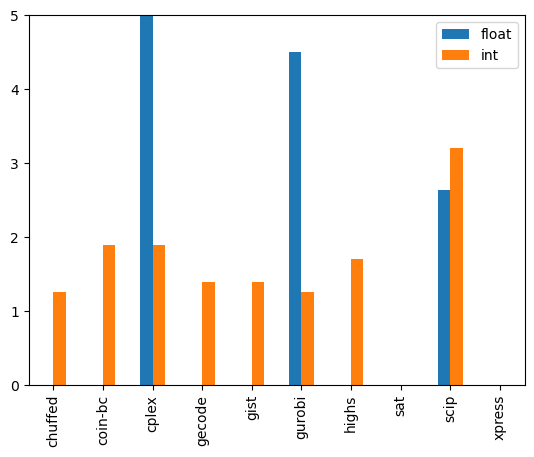

In [84]:
dfplot = df_sat_mi.loc['time'].unstack().plot(kind='bar')
plt.ylim(top=5)
dfplot

In [85]:
df_sat_nu = df_sat.copy()
df_min_nu = df_min.copy()
df_min_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_min'), (x.split('_') for x in df_min.columns))))
df_sat_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_sat'), (x.split('_') for x in df_sat.columns))))
df_join_mi = df_sat_nu.join(df_min_nu)
df_join_mi = df_join_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_join_mi

chuffed         coin-bc           cplex                              \
     int_sat int_min int_sat int_min int_sat int_min float_sat float_min   
nb     4.000   4.000   5.000   4.000   5.000   4.000    47.000     6.000   
time   1.254   1.018   1.894   1.255   1.897   1.285    18.362     2.088   

      gecode          ...   highs             sat            scip          \
     int_sat int_min  ... int_sat int_min int_sat int_min int_sat int_min   
nb     4.000   4.000  ...   4.000     NaN     0.0   4.000   7.000   4.000   
time   1.385   1.061  ...   1.699     NaN     NaN   1.124   3.208   1.712   

                          xpress          
     float_sat float_min int_sat int_min  
nb       5.000     6.000     NaN     NaN  
time     2.631     2.458     NaN     NaN  

[2 rows x 26 columns]

<AxesSubplot:>

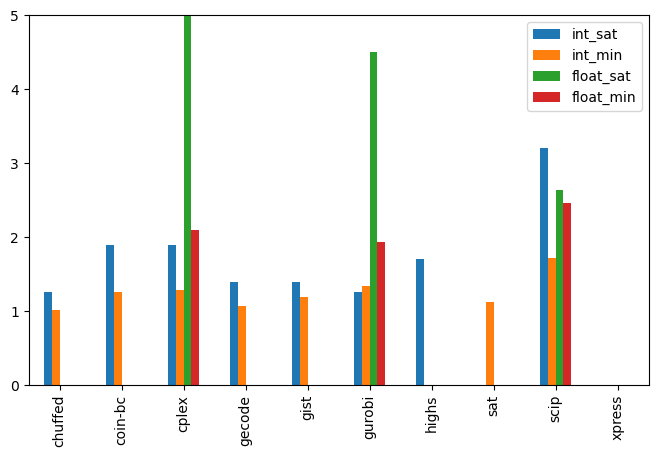

In [99]:
dfplot = df_join_mi.loc['time'].unstack()[["int_sat", "int_min", "float_sat", "float_min"]].plot(kind='bar', figsize=(8,4.8))
plt.ylim(top=5)
dfplot

In [87]:
df_join_mi[["int_sat", "int_min", "float_min", "float_sat"]]

KeyError: "['int_sat' 'int_min' 'float_min' 'float_sat'] not in index"